In [1]:
%reload_ext autoreload
%autoreload 2
import pn_analyze, _data, _graphs

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib
import pandas as pd
import sqlite3
import os, time
import datetime
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from collections import OrderedDict
import matplotlib
import bokeh
import socket
from bokeh.plotting import figure, output_notebook, show
matplotlib.style.use('ggplot')
# DB_FILE_LOCATION = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'pynet_database.db')
DB_FILE_LOCATION = 'G:\\ext\\random_crap\\pynet_database.db'
now = datetime.datetime.now()
REGEX_PATTERN_GCI =  r'[A-Z]\w{5,7}'
TIMESTAMP_PARSE_DICT = {'case_timestamp': '%Y-%m-%dT%H:%M:%S.%fZ'}

ImportError: No module named 'sqlalchemy'

In [5]:
from collections import namedtuple

In [6]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.charts as chart

In [26]:
!which py

/c/Windows/py


In [3]:
output_notebook()

NameError: name 'output_notebook' is not defined

In [8]:
DB_FILE_LOCATION
disk_engine = create_engine('sqlite:///%s' % DB_FILE_LOCATION)
def loadup_func(disk_engine):
    metrics = pn_analyze.TestResult(disk_engine)
    metrics.strict_startup()
    return metrics

In [ ]:
# uncomment on initialization of notebook
metrics = loadup_func(disk_engine)
metrics.this_year = _data.this_year(metrics.df, 'case_timestamp')
metrics.this_month = _data.this_month(metrics.df, 'case_timestamp')
metrics.today = _data.this_month(metrics.df, 'case_timestamp')

In [11]:
this_month = None

In [28]:
rng = pd.date_range('9/15/2016', periods=72, freq='H')

In [31]:
from pandas.tseries.offsets import BDay

In [16]:
metrics.df[metrics.df.case_timestamp == datetime.date(2016, 9, 16)]

,group_uuid,scenario_uuid,case_uuid,case_service_name,case_id,case_description,case_timestamp,case_status,case_client_ip,case_endpoint,case_action,case_duration,numeric_status,failed,passed,skipped,date_int


In [22]:
metrics.this_year

In [24]:
this_month = datetime.datetime.now().month

- scenarios passing over time
- cases passing over time
- should log profile somewhere -- would be nice for metrics (ex. mock data vs live data)
- time per test run vs time per case -- cross reference with url endpoint so we can see what's slowing down  
- right now there is a filter for totally failed test runs, there should be one where if it is outside of say, 5 sigma of average tests failing it should be removed from df. also if # tests in guuid is out of ~7 sigma, get rid of that too

*remember how to write good masks! you forgot!*

In [11]:
# this_y_sans_gci_bs.groupby('case_id').scenario_uuid.count()

In [16]:
dis_year = metrics.df[metrics.this_year]
by_case_action = dis_year.groupby('case_action')
by_guid = dis_year.groupby('group_uuid')
latest = dis_year[dis_year.group_uuid.isin([_data.return_guuid_latest(dis_year)])]
count_guid = by_guid.agg('count')
count_guid[count_guid.scenario_uuid == count_guid.max().scenario_uuid].index

Index(['929070ca281f4ea9b691828dcada60fb'], dtype='object', name='group_uuid')

## need a histogram of case status for endpoints
### With a comparison to mean histogram of status

In [17]:
len(metrics.df[metrics.df.group_uuid == '16d5322813624f8e8449ef803b69bbab'].case_id.unique())

830

In [18]:
latest[_data.return_in_norm_df(latest, 'case_duration', 2)]

,group_uuid,scenario_uuid,case_uuid,case_service_name,case_id,case_description,case_timestamp,case_status,case_client_ip,case_endpoint,case_action,case_duration,numeric_status,failed,passed,skipped,date_int
2679,4b46916b01c84582afd546d744a256d3,7dcb8d48aa6346d5bed1e75116ca01a8,1eeb6629e3994df595354f4c53937a58,BOLTServicesBranch,101-008-0001,GET Customs Home Page,2016-09-13 16:32:40.417174,passed,10.1.178.201,localhost:8080,home.test,0.125975,1,0.0,1.0,0.0,1473784360417174000
2680,4b46916b01c84582afd546d744a256d3,2b5cfc061eb647ebae3bc3540c054e17,4d0cb57c33ae41579fa0f4c598c597d6,BOLTServicesBranch,002-004-0001,POST Compute Line,2016-09-13 16:32:40.529150,passed,10.1.178.201,localhost:8080,pullpsm.test,0.094981,1,0.0,1.0,0.0,1473784360529150000
2681,4b46916b01c84582afd546d744a256d3,31e6ff1cad8d485f8038448ccbbde7d7,8f544865622841a798a9441563ed0b0d,BOLTServicesBranch,103-001-0002,POST Create new Declaration,2016-09-13 16:32:41.291999,passed,10.1.178.201,localhost:8080,new.test,0.741852,1,0.0,1.0,0.0,1473784361291999000
2682,4b46916b01c84582afd546d744a256d3,31e6ff1cad8d485f8038448ccbbde7d7,4f0f3b5fce76404682419840d6c0f2ff,BOLTServicesBranch,103-001-0003,POST Negative Save of a Declaration without a ...,2016-09-13 16:32:43.171622,passed,10.1.178.201,localhost:8080,save.test,1.857629,1,0.0,1.0,0.0,1473784363171622000
2683,4b46916b01c84582afd546d744a256d3,77367fb03b8e4c2b85a392bd9380b029,5dedc33ec1e2429cb0707c9e0c09155e,BOLTServicesBranch,103-004-0001,POST Quick Save,2016-09-13 16:32:43.769503,passed,10.1.178.201,localhost:8080,quicksave.test,0.569886,1,0.0,1.0,0.0,1473784363769503000
2684,4b46916b01c84582afd546d744a256d3,77367fb03b8e4c2b85a392bd9380b029,ebfafcdd1ddd4a03bbafdef2dec9d990,BOLTServicesBranch,103-004-0002,POST Cancel of an attaching an invoice,2016-09-13 16:32:44.725311,passed,10.1.178.201,localhost:8080,cancel.test,0.933813,1,0.0,1.0,0.0,1473784364725311000
2685,4b46916b01c84582afd546d744a256d3,a8d60cccdc6c47bcbaf68690d6ac700b,e579271063f64adfaab2ca0553d8c8c9,BOLTServicesBranch,105-001-0002,POST Save of a Declaration with No Importer GCI,2016-09-13 16:32:46.370982,passed,10.1.178.201,localhost:8080,save.test,1.615677,1,0.0,1.0,0.0,1473784366370982000
2686,4b46916b01c84582afd546d744a256d3,a8d60cccdc6c47bcbaf68690d6ac700b,b38201864e7f4c2989c0e3405952ccdc,BOLTServicesBranch,105-001-0003,"unlock the declaration, for some reason...",2016-09-13 16:32:46.515954,passed,10.1.178.201,localhost:8080,unlock.test,0.115977,1,0.0,1.0,0.0,1473784366515954000
2687,4b46916b01c84582afd546d744a256d3,a8d60cccdc6c47bcbaf68690d6ac700b,bffadd6576ab411a8177e28c094f82ca,BOLTServicesBranch,105-001-0004,POST Transmit of a Declaration with No Importe...,2016-09-13 16:32:48.661524,passed,10.1.178.201,localhost:8080,transmit.test,2.113577,1,0.0,1.0,0.0,1473784368661524000
2688,4b46916b01c84582afd546d744a256d3,a8d60cccdc6c47bcbaf68690d6ac700b,346de19c9dee484eb91776a961e9452e,BOLTServicesBranch,105-001-0008,POST Save of a Declaration with denied Importe...,2016-09-13 16:32:52.973661,passed,10.1.178.201,localhost:8080,save.test,4.273145,1,0.0,1.0,0.0,1473784372973661000


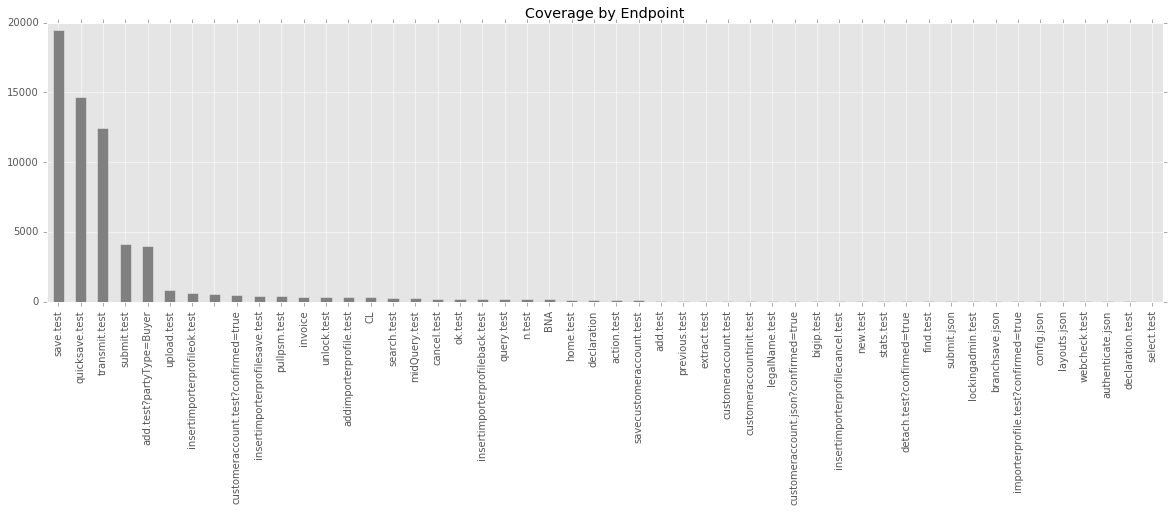

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
metrics.df[metrics.this_month].case_action.value_counts().plot(kind='bar', ax=ax, color='gray')
ax.set_title('Coverage by Endpoint')

In [33]:
from bokeh.charts import Histogram, output_file, show
from bokeh.sampledata.autompg import autompg as df
import bokeh.plotting as bk

hist = Histogram(df, values='hp', color='cyl',
                 title="HP Distribution by Cylinder Count", legend='top_right')

# output_file("histogram_single.html", title="histogram_single.py example")
# hist = 
# show(hist)

In [34]:
h = chart.Histogram(latest.case_action.map(hist_map), bins = 2*len(hist_map))
h.xaxis[0].formatter = FixedTickFormatter(labels=inv_map)
show(h)

NameError: name 'hist_map' is not defined

In [80]:
pf_metrics = metrics.df[(metrics.df.numeric_status !=3) & metrics.this_month]

In [59]:
caseidgroup = pf_metrics.groupby('case_id')
ssorted = caseidgroup.numeric_status.mean()
ssorted.sort_values()[:10]

case_id
026-016-0006    0.000000
031-004-0001    0.000000
160-004-0001    0.000000
160-001-0007    0.000000
161-006-0001    0.333333
004-011-0004    0.333333
001-004-0001    0.480000
026-001-0004    0.500000
026-001-0005    0.500000
160-002-0001    0.552632
Name: numeric_status, dtype: float64

In [88]:
har = metrics.df.groupby('case_id')

In [89]:
ssorted = har.numeric_status.mean()

In [95]:
ssorted.sort_values().index

Index(['999-999-9999', '008-006-0037', '008-006-0038', '008-006-0039',
       '008-006-0040', '008-007-0005', '008-007-0006', '008-007-0007',
       '008-007-0008', '008-007-0009',
       ...
       '001-002-0003', '004-019-0002', '010-005-0005', '003-001-0005',
       '017-001-0008', '010-038-0002', '017-024-0002', '017-025-0002',
       '001-002-0004', '003-006-0003'],
      dtype='object', name='case_id', length=1919)

In [53]:
def highest_failures_by_groupby_count(groupby_df, count):
    mean_status = groupby_df.numeric_status.mean()
    worst = mean_status.sort_values()[:count]
    return worst

In [21]:
def highest_failures_by_groupby_stdev(groupby_df, sigma=0):
    vals = groupby_df.numeric_status.mean()
    normed_vals = vals[~_data.return_in_norm_series(vals, sigma)]
    not_pass_fail_100 = normed_vals[(normed_vals <= 0.95) & (normed_vals != 0)]
    print(type(not_pass_fail_100))
    return not_pass_fail_100

In [22]:
def bar_plot_w_numeric_status(groupby_df, sigma=0):
    fig, ax = plt.subplots(figsize=(20,10))
    not_pass_fail_100 = highest_failures_by_groupby(groupby_df, sigma)
    ax.bar(np.arange(len(not_pass_fail_100)), not_pass_fail_100)
    ax.set_xticks(np.arange(len(not_pass_fail_100))+0.5)
    ax.set_xticklabels(not_pass_fail_100.keys(), rotation=80)
    return fig, ax, not_pass_fail_100.keys()

<class 'pandas.core.series.Series'>


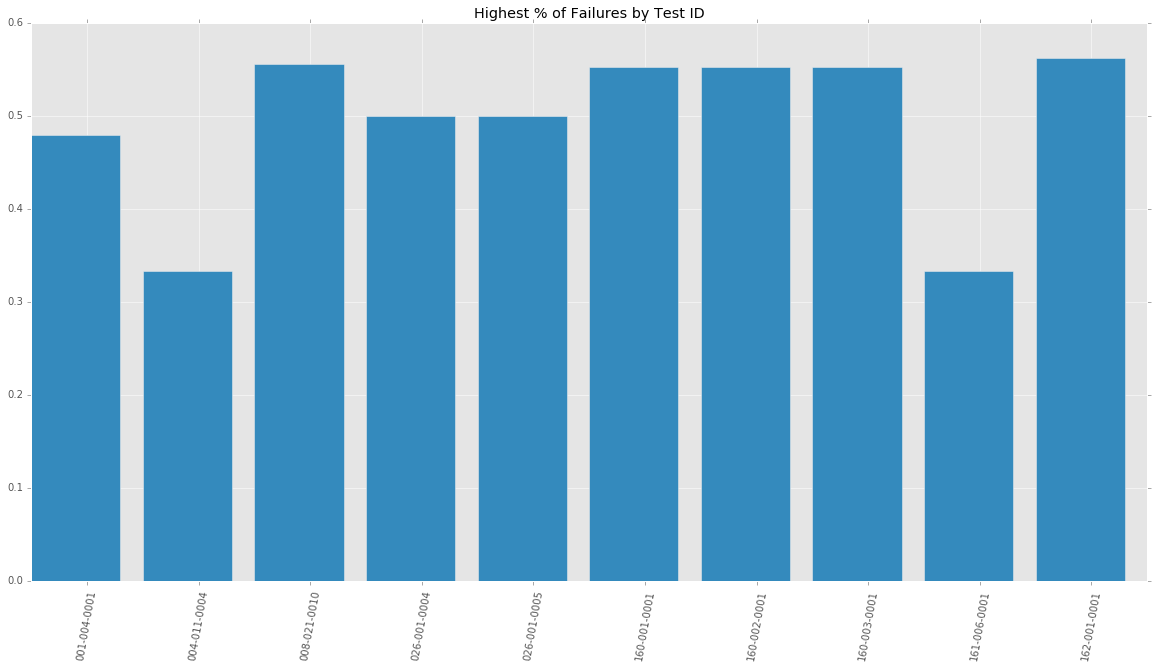

In [26]:
fig, ax, list_keys = bar_plot_w_numeric_status(pf_metrics.groupby('case_id'), 1.8)
ax.set_title('Highest % of Failures by Test ID')

In [28]:
output_notebook()

Loading BokehJS ...

In [29]:
hardy = pf_metrics[(pf_metrics.numeric_status == 0) | (pf_metrics.numeric_status == 1)].groupby('case_id').numeric_status.mean()

In [58]:
highest_failures_by_groupby_count(metrics.df.groupby('case_id'), 15)

case_id
999-999-9999    0.0
008-006-0037    0.0
008-006-0038    0.0
008-006-0039    0.0
008-006-0040    0.0
008-007-0005    0.0
008-007-0006    0.0
008-007-0007    0.0
008-007-0008    0.0
008-007-0009    0.0
008-007-0010    0.0
008-007-0011    0.0
008-006-0036    0.0
008-007-0012    0.0
008-007-0014    0.0
Name: numeric_status, dtype: float64

## These passing rate case ids need a filter on them -- if a test was just run a few times compared to the others, it may not be an accurate representation of the data

In [84]:
p = Bar(highest_failures_by_groupby_count(metrics.df.groupby('case_id'), 20), plot_width=800, plot_height=500, legend=None, 
        title='Lowest 20 Passing Rate Case Ids for Current Month', ylabel='Pass Rate')

In [87]:
highest_failures_by_groupby_count(metrics.df.groupby('case_id'), 20)

case_id
999-999-9999    0.0
008-006-0037    0.0
008-006-0038    0.0
008-006-0039    0.0
008-006-0040    0.0
008-007-0005    0.0
008-007-0006    0.0
008-007-0007    0.0
008-007-0008    0.0
008-007-0009    0.0
008-007-0010    0.0
008-007-0011    0.0
008-006-0036    0.0
008-007-0012    0.0
008-007-0014    0.0
008-007-0015    0.0
008-007-0016    0.0
008-007-0021    0.0
008-007-0022    0.0
008-007-0023    0.0
Name: numeric_status, dtype: float64

In [36]:
p = Bar(highest_failures_by_groupby(pf_metrics.groupby('case_id'), 1.5))
show(p)

<class 'pandas.core.series.Series'>


In [74]:
a = 'Service call queryAdCvd. \n\t\t\tCC 10.05.2015 added flags for send to customs and return AE records.\n\t\t\tflags have no affect.'
b = [c.strip() for c in a.splitlines()]

In [77]:
' '.join(b)

'Service call queryAdCvd. CC 10.05.2015 added flags for send to customs and return AE records. flags have no affect.'

In [72]:
metrics.df.case_description.unique()

array([ 'Service call queryAdCvd. \n\t\t\tCC 10.05.2015 added flags for send to customs and return AE records.\n\t\t\tflags have no affect.',
       "Bug 362 - use TEST instead of a 4-digit number in A Header record. \n\t\tTest processAC service call.  should return version and 'false' for hasConfirms, hasErrors and hasMessages.",
       'eBond service call createBond request/response valid request with a single line. \n\t\t\t\tResponse should have no messages or errors. No event created in cfit since the cfit file \n\t\t\t\tdoes not exist.  host was - devcombo023.dr1.ei:8121',
       ...,
       'Switch back to first invoice so that when saving, the bad hs data will validate.',
       'Save on first invoice, validations on second invoice should come back.',
       'Finding the previously created declaration using search and verifying if all the required attributes are found.\n\t\t'], dtype=object)

In [95]:
boop = highest_failures_by_groupby(pf_metrics.groupby('case_id'), 1.5)

<class 'pandas.core.series.Series'>


In [96]:
p = Bar(boop, title="Lowest Pass Rate by Test ID", legend=False)
show(p)

In [ ]:
from bokeh.sampledata.autompg import autompg as df
df.head()

In [ ]:
groupby_id = metrics.df.groupby('case_id')

In [ ]:
groupby_id.agg([np.mean, np.std]).case_duration.max()

In [ ]:
aggregation = {
    'case_duration' : {
        'mean_duration': 'mean',
        'std_dev': 'std'
    }
}

In [ ]:
groupby_id = metrics.df.groupby('case_id')
mean_duration_df = groupby_id.agg(aggregation).dropna()

In [ ]:
max_duration= mean_duration_df[(mean_duration_df.case_duration.mean_duration == 
                                                   mean_duration_df.case_duration.mean_duration.max())]

In [ ]:
max_duration_over_time = _data.return_specific_case_over_time(metrics.df, max_duration.index.values[0])

In [ ]:
max_duration_over_time.head()

In [ ]:
# new_cmap = rand_cmap(100, type='bright', first_color_black=True, last_color_black=False, verbose=True)
# plt.register_cmap(name='forplot', data=new_cmap)
# type(new_cmap)

In [ ]:
def plot(df, fig, ax):
    if df.case_client_ip.unique() == 1:
        case_client_ip = df.case_client_ip.unique()[0]
        try:
            hostname = get_hostname(case_client_ip)
        except:
            hostname = case_client_ip
    else:
        hostname = None
    df.plot('date_int', 'case_duration', kind='scatter', ax=ax, color=np.random.rand(3,1), label=hostname)
#     xtick_range = (over_time.dropna().date_int.max() - over_time.dropna().date_int.min()) / 10
#     current_xticks = [a.get_text() for a in ax.get_xticklabels()]
    d = list(map(lambda x: pd.to_datetime(x).strftime('%m-%d-%Y'), ax.get_xticks()))
    ax.set_xticklabels(d, rotation=70)
    ax.set_title('.'.join(df.case_id.unique()))

In [ ]:
metrics.df.case_client_ip.unique()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plot(_data.return_longest_case_over_time(metrics.df[(metrics.df.case_endpoint.str.contains('localhost')) & 
                                            (metrics.df.case_client_ip == '10.1.178.183') & (metrics.df.passed == 1)],
                                   aggregation), fig, ax)

In [ ]:
# fig, ax = plt.subplots(figsize=(20,10))
a = _data.return_longest_case_over_time(metrics.df[metrics.df.case_endpoint.str.contains('qacombo016')], aggregation)
b = _data.return_in_norm_df(a, 'case_duration', 1)
len(a[b])
a = cm.get_cmap('nipy_spectral')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
t = 0
for ip in metrics.df.case_client_ip.unique():
    if ip:
#         print(ip)
        plot(_data.return_longest_case_over_time(metrics.df[(metrics.df.case_endpoint.str.contains('localhost')) & 
                                                    (metrics.df.case_client_ip == ip) & (metrics.df.passed == 1)], aggregation), fig, ax)
        t+=1

In [ ]:
plt.scatter(metrics.df.date_int, metrics.df.case_duration, cmap='Blues', c=range(len(metrics.df.date_int)))

In [ ]:
def return_mean_duration_over_time(df):
    mean_time_v_endpoint = df.groupby('case_endpoint')
    mean_v_endpoint = mean_duration_v_case_endpoint.agg(aggregation)

In [ ]:
mean_time_v_endpoint = metrics.df.groupby('case_endpoint')
mean_v_endpoint = mean_time_v_endpoint.agg(aggregation)
mean_v_endpoint['ticks'] = pd.Series(range(len(mean_v_endpoint.index.values)), index=mean_v_endpoint.index)

In [ ]:
mean_v_endpoint

In [ ]:
# mean_v_endpoint.plot('index', 'mean_duration')
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(range(len(mean_v_endpoint.index.values)), mean_v_endpoint.case_duration.mean_duration)
ax.set_xticks(_graphs.create_uniform_tcks(mean_v_endpoint.index.values))
ax.set_xticklabels(mean_v_endpoint.index.values, rotation = 70)

In [ ]:
len(metrics.df[metrics.df.case_client_ip == '10.1.178.201'])

In [ ]:
(len(metrics.df) - len(metrics.df[metrics.df.case_timestamp.isnull()])) / len(metrics.df)

In [ ]:
metrics.df.columns

In [ ]:
metrics.df.case_service_name.unique()

In [ ]:
count_agg = {
    'scenario_uuid' : {
        'count': 'count'
    }
}

 ### USE THIS!  
``index.get_level_values('index_name')``

In [ ]:
def _get_case_count_by_service(df):
    service_names = df.case_service_name.unique()
    count_frame = df.groupby(['case_service_name', 'group_uuid']).agg({'scenario_uuid' : {'count': 'count'}})
    service_v_count = {}
    for service in service_names:
        serv_frame = count_frame.loc[service]
        max_scenario_uuid = serv_frame.scenario_uuid.max()
        largest_guiid = serv_frame.scenario_uuid[serv_frame.scenario_uuid == max_scenario_uuid].dropna().index.values
        largest_run = df[df.group_uuid ==  largest_guiid[0]]
        full_name = largest_run.case_service_name.str.cat(largest_run.case_id, sep='_')
        case_count = len(full_name.unique())
        service_v_count[service] = case_count
    return service_v_count

 use ``get_case_list_by_group``, then ``str.cat`` on service_name + case_id, then can use  ``.isin(group_case_list[group])`` to get defs by group

In [ ]:
def get_case_list_by_group(config):
#     Identity = namedtuple('Identity', ['service', 'id'])
    groups = config.get('groups')
    full_case_lists = {}
    for group_name, group in groups.items():
        cases = group['cases']
        if group.get('dependencies'):
            for dep in group.get('dependencies'):
                dependencies_tests = groups.get(dep).get('cases')
                cases +=  dependencies_tests
        full_case_lists[group_name] = cases
    return full_case_lists

In [ ]:
import json
with open('config.json', 'rb') as in_file:
    config = json.loads(in_file.read().decode())

In [ ]:
# def get_case_count_by_config(df, config):
#     group_case_list = get_case_list_by_group(config)
    # this may not be necessary as the you could just do
    #a .isin(group_case_list[group]) to get what you need. (and a .str.cat on service_name + case_id)

In [ ]:
_get_case_count_by_service(metrics.df)

In [ ]:
count_frame = metrics.df.groupby(['case_service_name', 'group_uuid']).agg(count_agg)

In [ ]:
bolt = count_frame.loc['BOLTServicesBranch']

In [ ]:
biggest_guiid = bolt.scenario_uuid[bolt.scenario_uuid == bolt.scenario_uuid.max()].dropna().index[0]

In [ ]:
metrics.df[metrics.df.group_uuid == biggest_guiid].case_id.unique()

In [ ]:
count_frame.loc['BOLTServicesBranch'].scenario_uuid.describe().max().values

In [ ]:
count_frame.loc['BOLTServicesBranch'].scenario_uuid.max()

In [ ]:
count_frame.loc['BOLTServicesBranch'].scenario_uuid[count_frame.loc['BOLTServicesBranch'].scenario_uuid ==6276].dropna().index.values

In [17]:
_data.this_month

<function expd_analytics._data.this_month>

AttributeError: 'TestResult' object has no attribute 'this_month'